In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import pycountry_convert as pc
from geopy import geocoders
import time 
import json

/Users/luna/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os
os.getcwd()

'/Users/luna/Documents/EPFL/Master/MA2/DataViz/Racket-Science/Milestones/milestone 1/preprocessing'

do not run again

In [3]:
!pip install pycountry-convert

# The Goat on each Surface

These datasets contain information and statistics about ATP and WTA tour matches. However, what interests us specifically is the surface on which these matches were played, the city, and the tournament. Therefore, we first filter the dataset to retain only the relevant information.

nce there is one dataset for each year, we performed comparisons within each individual year. You can simply change the year argument to view the dataset for the year you're interested in.

In [4]:
# Print head of the filtered data, (the usefull informations)


data_folder = "data/ultimate_tennis_matches_dataset/"
wta_or_atp = "atp/"
year = "2007"
output_folder = f"results/surfaces/{year}/{wta_or_atp}"


ultimate = pd.read_excel(data_folder + wta_or_atp + year + ".xls") 

#ultimate_filtered = ultimate[['Date', 'Court', 'Surface', 'Winner', 'Loser', 'Location', 'Round', 'WRank', 'WPts']]

ultimate_filtered = ultimate[['Date', 'Surface', 'Winner', 'Tournament', 'Location']]

print(ultimate_filtered.head())

        Date Surface        Winner                              Tournament  \
0 2007-01-01    Hard     Luczak P.  Next Generation Adelaide International   
1 2007-01-01    Hard      Serra F.  Next Generation Adelaide International   
2 2007-01-01    Hard      Jones A.  Next Generation Adelaide International   
3 2007-01-01    Hard   Guccione C.  Next Generation Adelaide International   
4 2007-01-02    Hard  Mathieu P.H.  Next Generation Adelaide International   

   Location  
0  Adelaide  
1  Adelaide  
2  Adelaide  
3  Adelaide  
4  Adelaide  


In [5]:
# Print the number of wins per players for each surface, across the whole dataset 
# (i.e. per year and not dependant of the location)

# Count the number of wins per surface for each winner
surface_counts = ultimate_filtered.groupby(['Winner', 'Surface']).size().unstack(fill_value=0)

print("The number of wins per players for each surface, across the whole dataset:\n")
# Display the results
print(surface_counts)

The number of wins per players for each surface, across the whole dataset:

Surface             Carpet  Clay  Grass  Hard
Winner                                       
Acasuso J.               0    13      0     5
Allegro Y.               0     0      1     0
Almagro N.               0    23      0     9
Alves T.                 0     1      0     0
Amritraj P.              0     0      2     0
...                    ...   ...    ...   ...
Zib T.                   0     0      1     2
Zverev M.                0     1      2     3
de Voest R.              0     0      0     3
di Mauro A.              0     4      0     0
van Scheppingen D.       0     0      0     1

[227 rows x 4 columns]


In [6]:
# The best player for each surface across the whole dataset 
# (i.e. per year and not dependant of the location)

# Find the top player on each surface
grass = clay = hard = False

if 'Grass' in surface_counts: 
    grass = True 
    best_grass = surface_counts['Grass'].idxmax()
    print(f"Best Grass Court Player: {best_grass} with {surface_counts.loc[best_grass, 'Grass']} wins")
    
if 'Clay' in surface_counts:
    clay = True
    best_clay = surface_counts['Clay'].idxmax()
    print(f"Best Clay Court Player: {best_clay} with {surface_counts.loc[best_clay, 'Clay']} wins")

if 'Hard' in surface_counts: 
    hard = True
    best_hard = surface_counts['Hard'].idxmax()
    print(f"Best Hard Court Player: {best_hard} with {surface_counts.loc[best_hard, 'Hard']} wins")

Best Grass Court Player: Mahut N. with 10 wins
Best Clay Court Player: Nadal R. with 31 wins
Best Hard Court Player: Djokovic N. with 43 wins


# 1. Overall best players for each surface in {year}

Here, we plot the top 5 players on each surface for the selected year.

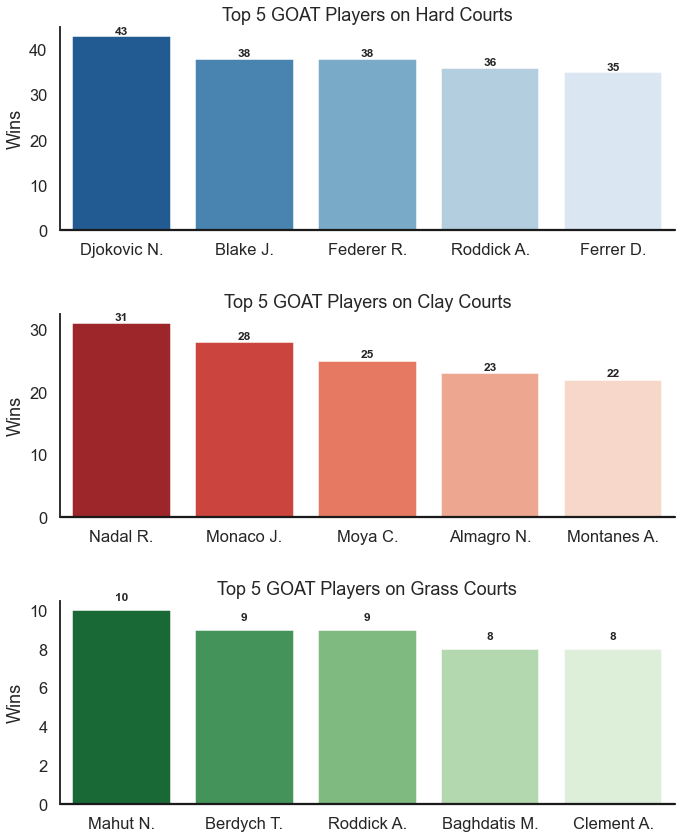

In [7]:
# Plot of the 5 best players on each surface across the whole dataset 
# (i.e. per year and not dependant of the location)

sns.set_theme(style="white", context="talk")

# Available surfaces in the dataset
available_surfaces = [surface for surface in ["Hard", "Clay", "Grass"] if surface in surface_counts]

for surface in available_surfaces:
    win_surface_df = surface_counts[surface].reset_index().sort_values(by=surface, ascending=False)
    win_surface_df.to_csv(output_folder + f"overall_goat_surfaces/wins_{surface.lower()}_{year}.csv", index=False)

# Find the top 5 players for each surface
top_players = {surface: surface_counts[[surface]].nlargest(5, surface).reset_index() for surface in available_surfaces}

fig, axes = plt.subplots(len(available_surfaces), 1, figsize=(10, 4 * len(available_surfaces)), sharex=False)

def add_annotations(ax, data, column):
    for i, v in enumerate(data[column]):
        ax.text(i, v + 0.5, str(v), ha='center', fontsize=12, fontweight='bold')

palette_map = {"Hard": "Blues_r", "Clay": "Reds_r", "Grass": "Greens_r"}

if len(available_surfaces) == 1:
    axes = [axes]

for i, surface in enumerate(available_surfaces):
    sns.barplot(
        x="Winner",
        y=surface,
        data=top_players[surface],
        palette=palette_map[surface],
        ax=axes[i]
    )
    axes[i].set_title(f"Top 5 GOAT Players on {surface} Courts")
    axes[i].set_ylabel("Wins")
    axes[i].set_xlabel("")
    axes[i].axhline(0, color="k", clip_on=False)
    add_annotations(axes[i], top_players[surface], surface)

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

#plt.show()

# 3. Best players on each surface, per tournaments in {year}

Here, the analysis goes beyond just the year: it compares player performances by tournament to identify the GOATs of each one.

In [8]:
tournament_names = ultimate['Tournament'].unique()

# Count the number of matches per Tournament
tournament_counts = ultimate_filtered[['Tournament']].value_counts()

print(tournament_counts)

Tournament                       
Wimbledon                            127
US Open                              127
Australian Open                      127
French Open                          127
Pacific Life Open                     95
                                    ... 
Hypo Group Tennis International       31
Idea Prokom Open                      31
Indianapolis Tennis Championships     31
International Championships           31
Masters Cup                           15
Length: 66, dtype: int64


In [9]:
# Find the best player for each city on each surface 
# (Usually every city has only one surface's type)
# Save the classement in each city in {year} for each surface

tournament_results = {}
    
with open(output_folder + f'tournament_list/tournaments_{year}.json', 'w', encoding='utf-8') as f:
    json.dump(tournament_names.tolist(), f, ensure_ascii=False, indent=2)
    
def save_csv_tournament(df, surface, tournament): 
    sorted_df = df[surface].sort_values(ascending=False)
    file_name = output_folder + f"tournament_goat/{tournament}_goat_players_on_{surface}_{year}.csv"
    sorted_df.to_csv(file_name, index=True)

for tournament in tournament_names:

    tournament_df = ultimate[ultimate['Tournament'] == tournament]

    # Compute wins by surface for each tournament
    tournament_surface_counts = tournament_df.groupby(['Winner', 'Surface']).size().unstack(fill_value=0)

    tournament_results[tournament] = tournament_surface_counts
    
    print(f"Tournament: {tournament}")
    if 'Grass' in tournament_surface_counts: 
        best_grass = tournament_surface_counts['Grass'].idxmax()
        #print(f"🎾 GOAT Grass Court Player in {tournament} in {year} 🎾: {best_grass} with {tournament_surface_counts.loc[best_grass, 'Grass']} wins")
        save_csv_tournament(tournament_surface_counts, 'Grass', tournament)
        
    if 'Clay' in tournament_surface_counts: 
        best_clay = tournament_surface_counts['Clay'].idxmax()
        #print(f"🎾 GOAT Clay Court Player in {tournament} in {year} 🎾: {best_clay} with {tournament_surface_counts.loc[best_clay, 'Clay']} wins")
        save_csv_tournament(tournament_surface_counts, 'Clay', tournament)
        
    if 'Hard' in tournament_surface_counts: 
        best_hard = tournament_surface_counts['Hard'].idxmax()
        #print(f"🎾 GOAT Hard Court Player in {tournament} in {year} 🎾: {best_hard} with {tournament_surface_counts.loc[best_hard, 'Hard']} wins")
        save_csv_tournament(tournament_surface_counts, 'Hard', tournament)
    print("="*40)
    

Tournament: Next Generation Adelaide International
Tournament: Chennai Open
Tournament: Qatar Exxon Mobil Open
Tournament: Heineken Open
Tournament: Sydney International
Tournament: Australian Open
Tournament: International Championships
Tournament: Movistar Open
Tournament: PBZ Zagreb Indoors
Tournament: Brasil Open
Tournament: Open 13
Tournament: SAP Open
Tournament: Copa Telmex
Tournament: Regions Morgan Keegan Championships
Tournament: ABN AMRO World Tennis Tournament
Tournament: Abierto Mexicano
Tournament: Dubai Tennis Championships
Tournament: Channel Open
Tournament: Pacific Life Open
Tournament: Sony Ericsson Open
Tournament: U.S. Men's Clay Court Championships
Tournament: Open de Tenis Comunidad Valenciana
Tournament: Monte Carlo Masters
Tournament: Open Seat Godo
Tournament: Grand Prix Hassan II
Tournament: Estoril Open
Tournament: BMW Open
Tournament: Internazionali BNL d'Italia
Tournament: Hamburg TMS
Tournament: Hypo Group Tennis International
Tournament: French Open
Tour

In [10]:
#palette_map = {"Hard": "Blues_r", "Clay": "Reds_r", "Grass": "Greens_r"}

#for tournament, df in tournament_results.items():

#    df_melted = df.reset_index().melt(id_vars="Winner", var_name="Surface", value_name="Wins")

#    df_melted = df_melted[df_melted["Wins"] > 0]


    #top_5_players = df_melted.groupby("Surface").apply(lambda x: x.nlargest(5, "Wins")).reset_index(drop=True)

    #plt.figure(figsize=(10, 6))
    #sns.barplot(
    #    data=top_5_players,
    #    x="Wins",
    #    y="Winner",
    #    hue="Surface",
    #    palette={surface: sns.color_palette(palette_map[surface], as_cmap=True)(0.7) for surface in top_5_players["Surface"].unique()}
    #)

    #plt.title(f"Top 5 Players by Surface in {tournament} in {year}", fontsize=14, fontweight='bold')
    #plt.xlabel("Wins")
    #plt.ylabel("Player")
    #plt.legend(title="Surface")
    #plt.grid(axis="x", linestyle="--", alpha=0.7)
    #plt.tight_layout()

    #plt.show()